In [20]:
import numpy as np
import scipy as sp
import scipy.io as spio
import scipy.signal as spsignal
from matplotlib import pyplot as plt
from PIL import Image


# Projeto 2 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: 
## Matrícula: 

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [21]:
# Código das funções utilizadas.
def deg(n):
    if n >= 0:
        return 1
    else:
        return 0

# Questão 1

Um sistema de aquisição de dados de eletrocardiograma foi ligado de forma equivocada perto demais da rede elétrica. Assim, a interferência da rede elétrica (a 60 Hz) aparece de forma marcante no sinal adquirido. O seu objetivo é projetar um filtro digital para eliminar totalmente o ruído em 60Hz. A frequência de amostragem do sistema é: 

$$ f_a = 500~Hz $$ 

Siga as questões abaixo.

## Questão 1a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [22]:
#Resposta da questão 1a

# TODO add foto quando for mandar

## Questão 1b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [23]:
#Resposta da questão 1b

# TODO add foto quando for mandar

## Questão 1c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

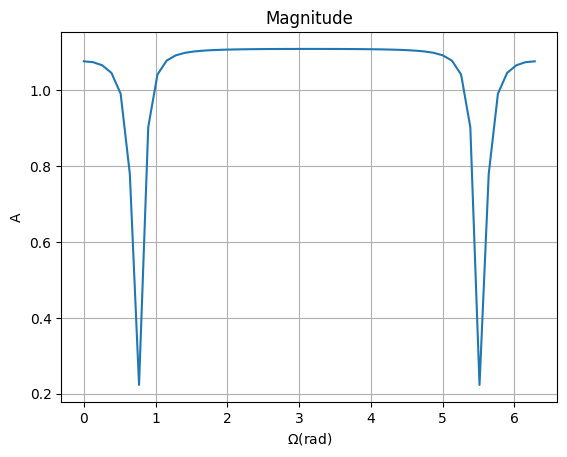

In [24]:
# Resposta da questão 1c
def A1(x):
    return np.sqrt((4.132 - 5.84 * np.cos(x) + 2 * np.cos(2*x))/(3.372 - 4.74 * np.cos(x) + 1.62 * np.cos(2*x)))


x = np.linspace(0, np.pi * 2)

plt.plot(x, A1(x))
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('A')
plt.title("Magnitude")
plt.grid(True)
plt.show()

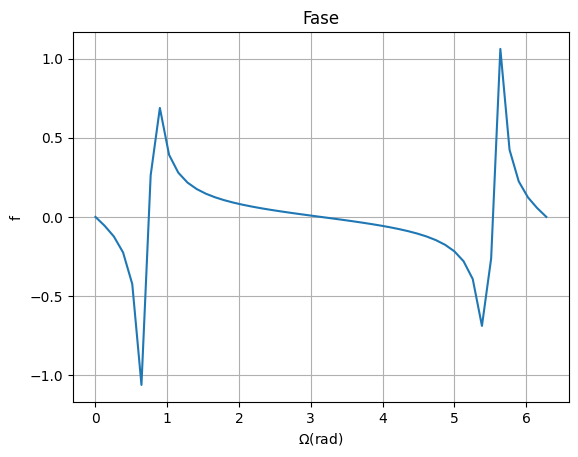

In [25]:
def F(x):
    return np.arctan((0.27 * np.sin(x) - 0.19 * np.sin(2*x))/(3.72 - 5.27 * np.cos(x) + 1.81 * np.cos(2*x)))


plt.plot(x, F(x))
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('f')
plt.title("Fase")
plt.grid(True)
plt.show()

## Questão 1d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

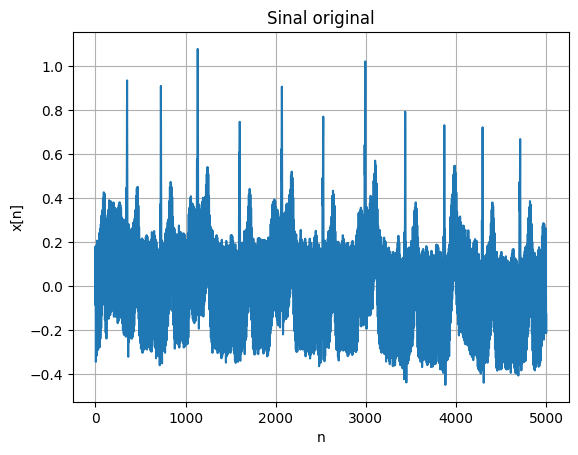

In [26]:
# Resposta da questão 1d
sinal = spio.loadmat('noisy_ecg_data.mat')['noisy_ecg'].ravel()

plt.plot(sinal)
plt.xlabel("n")
plt.ylabel('x[n]')
plt.title("Sinal original")
plt.grid(True)
plt.show()

C:\Users\geral\AppData\Local\Temp\ipykernel_32396\3738380504.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  h[n] = (-0.117284 + 0.00640434j) * np.exp((-0.105361 - 0.766994j) * n) - (0.117284 + 0.00640434j) * np.exp((-0.105361 + 0.766994j) * n)


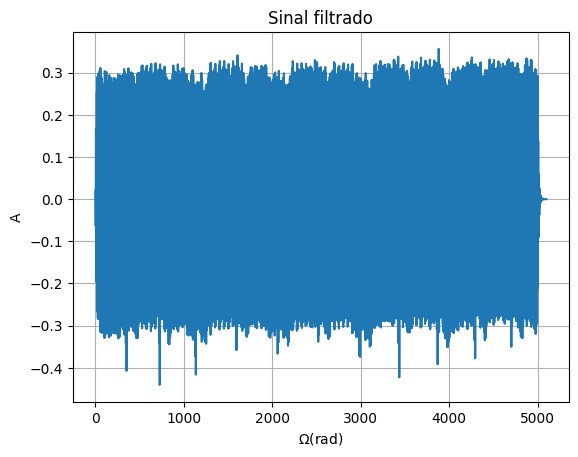

In [27]:
h = np.zeros(100)

# Transformada inversa feita pelo WolframAlpha
for n in range(100):
    h[n] = (-0.117284 + 0.00640434j) * np.exp((-0.105361 - 0.766994j) * n) - (0.117284 + 0.00640434j) * np.exp((-0.105361 + 0.766994j) * n)

filtrado = np.convolve(sinal, h)

plt.plot(filtrado)
plt.xlabel(r'$\Omega$' + "(rad)")
plt.ylabel('A')
plt.title("Sinal filtrado")
plt.grid(True)
plt.show()

# Questão 2

Ainda no sistema de aquisição de dados de eletrocardiograma, mais tarde foi verificado que, mesmo depois de resolvido o problema da interferência da rede elétrica (i.e., o sinal não tem um ruído específico em 60Hz), o sinal adquirido tinha bastante ruído de alta frequência (acima de 35Hz). O objetivo desta questão é projetar um filtro digital para atenuar as frequências acima de 35Hz. A frequêencia de amostragem do sistema é:

$$ f_a = 500~Hz $$

Siga as questões abaixo.

## Questão 2a (0.5  pontos)

Projete o filtro em questão utilizando a colocação de pólos e zeros no plano z. Desenhe o diagrama de pólos e zeros do filtro projetado, indicando quais pólos e zeros foram indicados e o porquê destes pólos/zeros terem sido escolhidos. Você pode inserir o seu projeto como uma imagem escaneada abaixo.

In [28]:
#Resposta da questão 2a

# TODO add foto!!!! codigo Image.open()

## Questão 2b (0.5 pontos)

A partir do diagrama desenvolvido na questão anterior, escreva a função de transferência do filtro H(z) e a equação de diferenças do sistema que realiza o filtro. Você pode inserir sua resposta como uma imagem escaneada abaixo.

In [29]:
#Resposta da questão 2b

# TODO add foto!!!

## Questão 2c (1  ponto)

Plote a **resposta em frequência** do filtro projetado (magnitude e fase). 

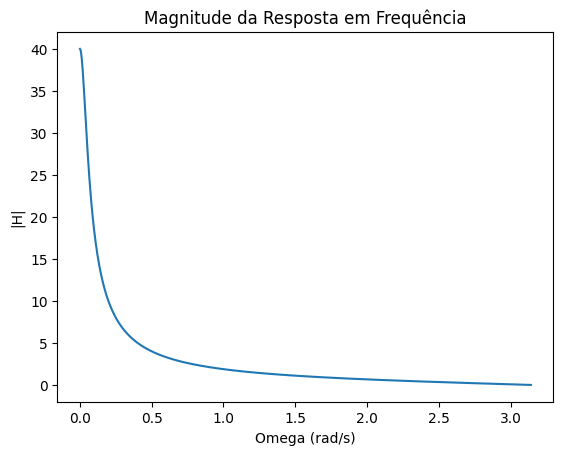

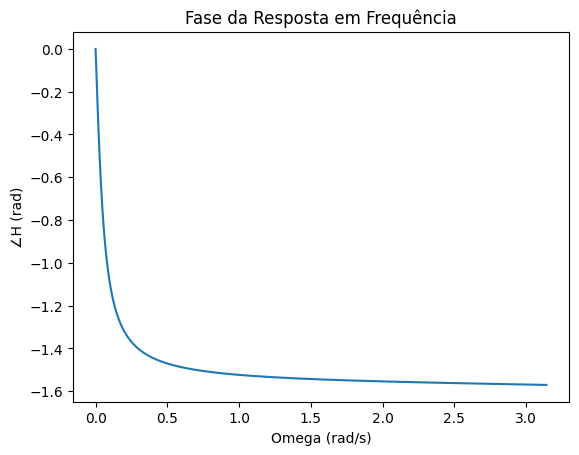

In [30]:
# Resposta da questão 2c

zero = -1
polo = 0.95

Omega = np.linspace(0, np.pi, 1000)

H_magnitude = np.zeros_like(Omega)
H_phase = np.zeros_like(Omega)

for i, omega in enumerate(Omega):
    H = (np.exp(1j * omega) - zero) / (np.exp(1j * omega) - polo)
    H_magnitude[i] = np.abs(H)
    H_phase[i] = np.angle(H)


plt.plot(Omega, H_magnitude)
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Omega (rad/s)')
plt.ylabel('|H|')
plt.show()

plt.plot(Omega, H_phase)
plt.title('Fase da Resposta em Frequência')
plt.xlabel('Omega (rad/s)')
plt.ylabel('∠H (rad)')
plt.show()

## Questão 2d (0.5  pontos)

Carregue o sinal de ECG "noisy_ecg_data_2.mat" e aplique o filtro projetado neste sinal. Plote o sinal antes da filtragem (x[n]) e o sinal após a filtragem (y[n]).

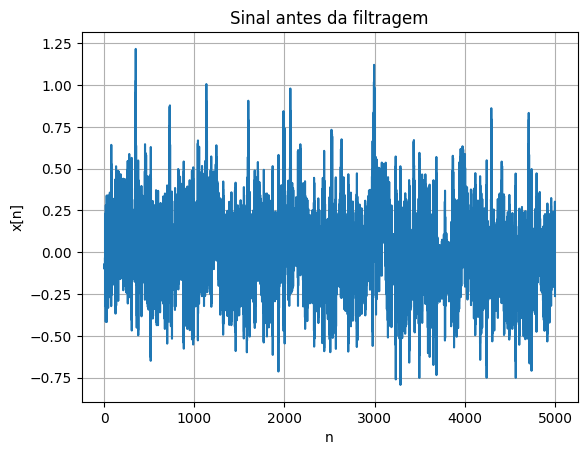

In [31]:
# Resposta da questão 2d

sinal = spio.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

hn = np.zeros(50)

for n in range(50):
    if n == 0:
        hn[n] = 1
    else:
        hn[n] =  2.05263*np.exp(-0.0512933*n) * deg(n)


sinalFiltrado = np.convolve(sinal, hn)

plt.plot(sinal)
plt.xlabel("n")
plt.ylabel("x[n]")
plt.title("Sinal antes da filtragem")
plt.grid(True)
plt.show()

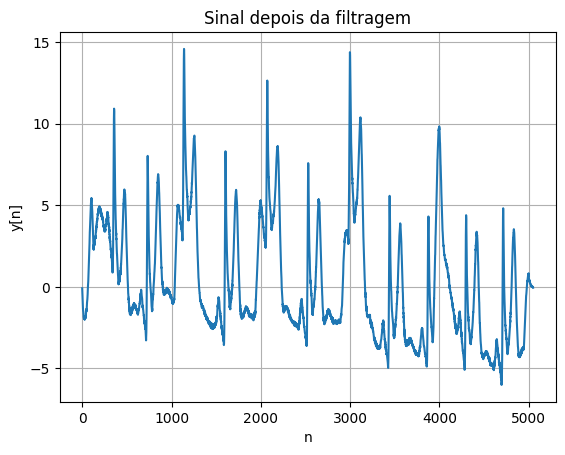

In [32]:
plt.plot(sinalFiltrado)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("Sinal depois da filtragem")
plt.grid(True)
plt.show()

# Questão 3

Considere o filtro analógico:

$$ H_a \left(s\right) = \frac{\omega_c}{\omega_c + s}$$

E considere o valor:

$$\omega_c = 10^3 $$

## Questão 3a (1  ponto)

Projete uma aproximação digital para este filtro com critério de 10%. Indique a taxa de amostragem calculada para esta aproximação (T1) e compare a resposta em frequência do filtro projetado H1() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

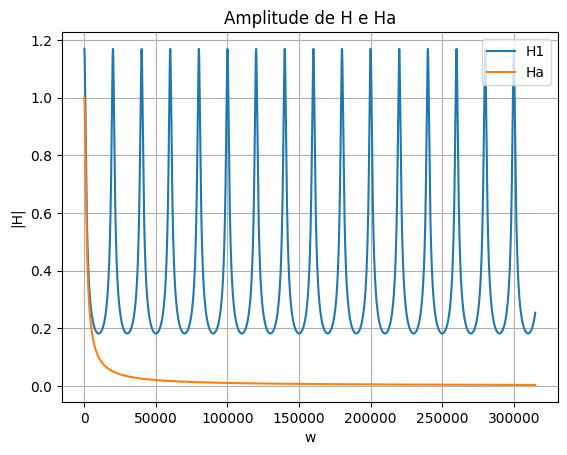

In [37]:
#! VER PAGINA 496 DO LATHI !

# Resposta da questão 3a
omega = np.linspace(0, 315000, 315000) # maior que (10**5) * pi

T1 = 0.0001 * np.pi # taxa de amostragem calculada

def H1(w):
    return (0.3142 / np.sqrt(1.533 - 1.4608 * np.cos(w*T1)))

def Ha(w):
    return (1000/(np.sqrt(w**2 + 1000000)))


plt.plot(H1(omega), label='H1')
plt.plot(Ha(omega), label='Ha')  
plt.xlabel("w")
plt.ylabel("|H|")
plt.title("Amplitude de H e Ha")
plt.grid(True)
plt.legend(loc='upper right')  
plt.show()

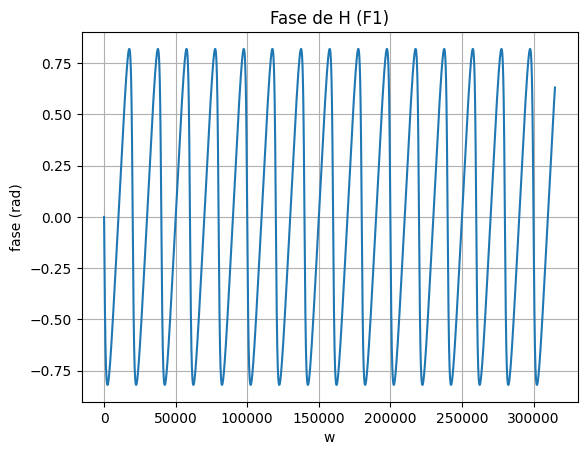

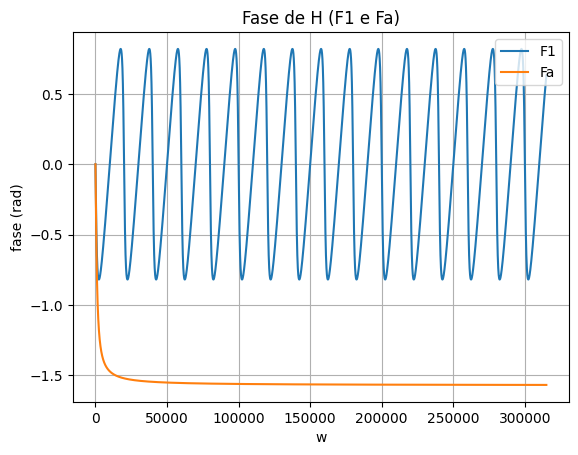

In [38]:
def F1(w):
    return -np.arctan2((0.7304 * np.sin(w*T1)), (1 - 0.7304 * np.cos(w * T1)))

def Fa(w):
    return -np.arctan(w/1000)

plt.plot(F1(omega))
plt.xlabel("w")
plt.ylabel('fase (rad)')
plt.title("Fase de H (F1)")
plt.grid(True)
plt.show()

plt.plot(F1(omega), label='F1')  
plt.plot(Fa(omega), label='Fa')  
plt.xlabel("w")
plt.ylabel('fase (rad)')
plt.title("Fase de H (F1 e Fa)")
plt.grid(True)
plt.legend(loc='upper right') 
plt.show()

## Questão 3b (1  ponto)

Projete uma aproximação digital para este filtro com critério de 1%. Indique a taxa de amostragem calculada para esta aproximação (T2) e compare a resposta em frequência do filtro projetado H2() com a resposta em frequência do filtro analógic Ha(). Plote as frequências até ao menos:

$$ \omega = 10^5 \pi $$

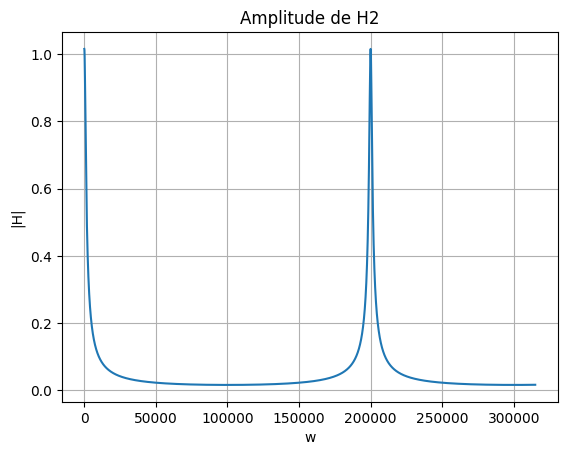

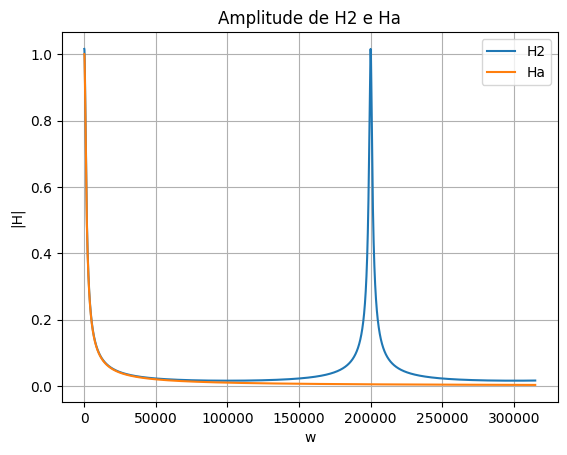

In [39]:
# Resposta da questão 3b

T2 = 0.00001 * np.pi # taxa de amostragem calculada

def H2(w):
    return ((np.pi*0.01) / np.sqrt((1-0.969072426305*np.cos(w*T2))**2 + (0.969072426305*np.sin(w*T2))**2))


plt.plot(H2(omega), label='H2')  
plt.xlabel("w")
plt.ylabel("|H|")
plt.title("Amplitude de H2")
plt.grid(True)
plt.show()

plt.plot(H2(omega), label='H2')
plt.plot(Ha(omega), label='Ha')  
plt.xlabel("w")
plt.ylabel("|H|")
plt.title("Amplitude de H2 e Ha")
plt.grid(True)
plt.legend(loc='upper right')  
plt.show()

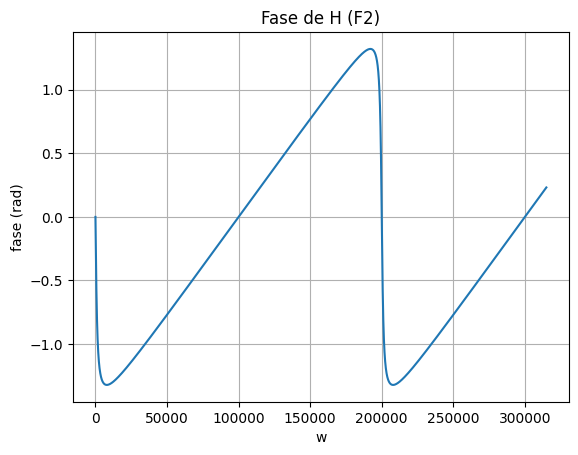

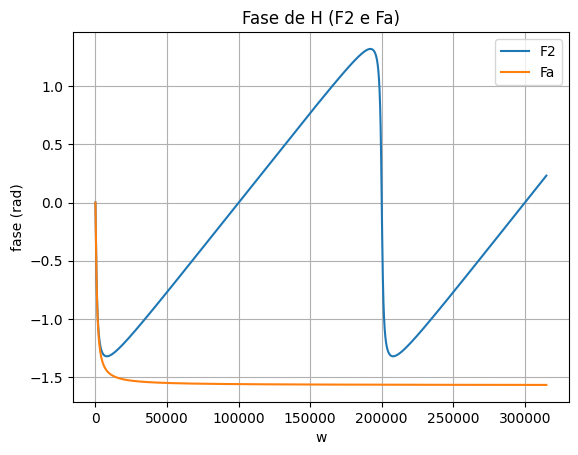

In [40]:
def F2(w):
    return -np.arctan2((0.969072426305*np.sin(w*T2)), (1-0.969072426305*np.cos(w*T2)))


plt.plot(F2(omega))
plt.xlabel("w")
plt.ylabel('fase (rad)')
plt.title("Fase de H (F2)")
plt.grid(True)
plt.show()

plt.plot(F2(omega), label='F2')  
plt.plot(Fa(omega), label='Fa')  
plt.xlabel("w")
plt.ylabel('fase (rad)')
plt.title("Fase de H (F2 e Fa)")
plt.grid(True)
plt.legend(loc='upper right')  
plt.show()

## Questão 3c (1 ponto)

Calcule a resposta ao impulso ha(t) do filtro analógico Ha(s), bem como as respostas ao impulso h1[n] e h2[n] dos filtros projetados H1(z) e H2(z). **Plote** as respostas ao impulso na mesma escala.

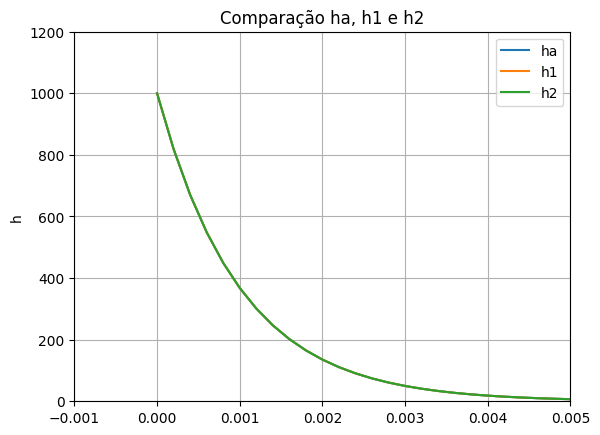

In [41]:
# Resposta da questão 3c

t_ = np.linspace(0, 1, 5000)
n_T1 = np.linspace(0, 1/T1, 5000) # 0 até o periodo que fará o tempo ser 1 ( (1/T1) * T1 = 1 )
n_T2 = np.linspace(0, 1/T2, 5000)

def ha(t): # h_a(t) = w_c * exp(-w_c * t)
    return 1000 * np.exp(-1000 * t)

def h1(n):
    return  1000 * np.exp(-1000 * T1 * n) # 1000 * T1 * np.exp(-1000 * T1 * n)

def h2(n):
    return  1000 * np.exp(-1000 * T2 * n) # 1000 * T2 * np.exp(-1000 * T2 * n)



plt.plot(t_, ha(t_), label='ha') 
plt.plot(t_, h1(n_T1), label='h1') 
plt.plot(t_, h2(n_T2), label='h2') 
plt.ylim(-0.01, 1200)
plt.xlim(-0.001, 0.005)
plt.ylabel('h')
plt.title("Comparação ha, h1 e h2")
plt.grid(True)
plt.legend(loc='upper right')  
plt.show()


## Questão 3d (2 pontos)

Considere o sinal:
$$ x\left(t\right) = e^{- \lambda t} u\left(t\right)$$

com

$$\lambda = 500 $$

Calcule a resposta teórica do filtro analógico, y(t), bem como a resposta do filtro digital H1(z) ao sinal amostrado com taxa T1 (x1[n]) e a resposta do filtro digital H2(z) ao sinal amostrado com taxa T2 (x2[n]). **Plote**, na mesma escala, o sinal y(t) e as aproximações y1[n] e y2[n]. 

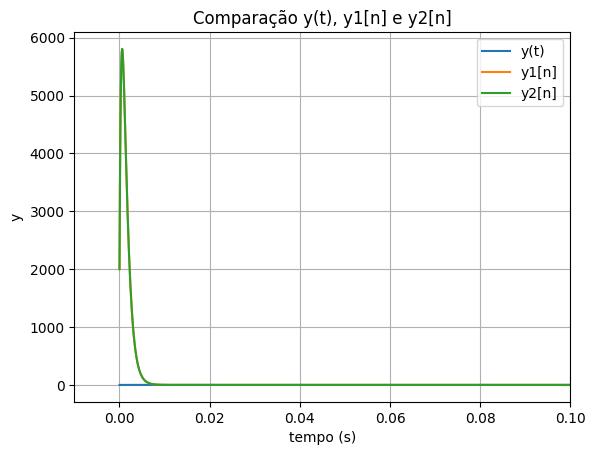

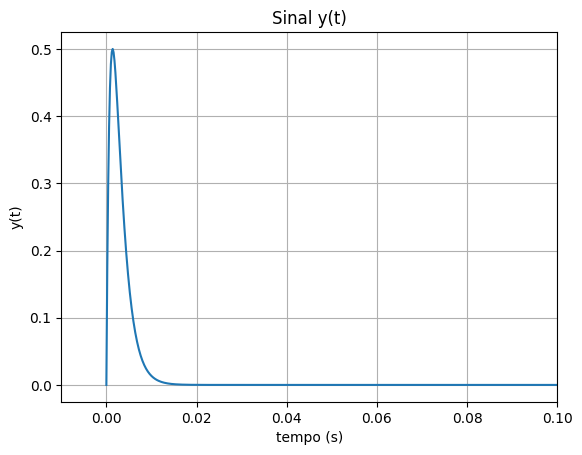

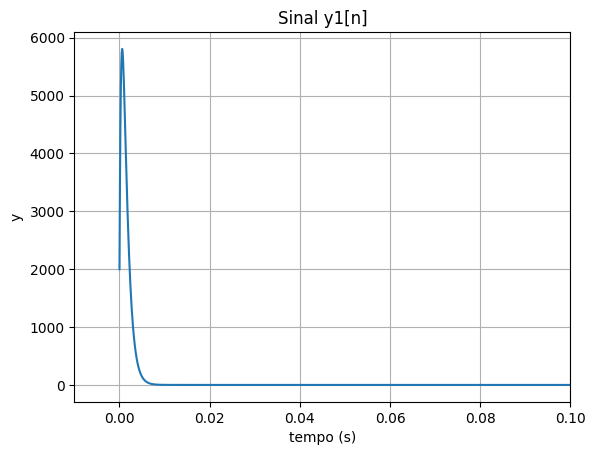

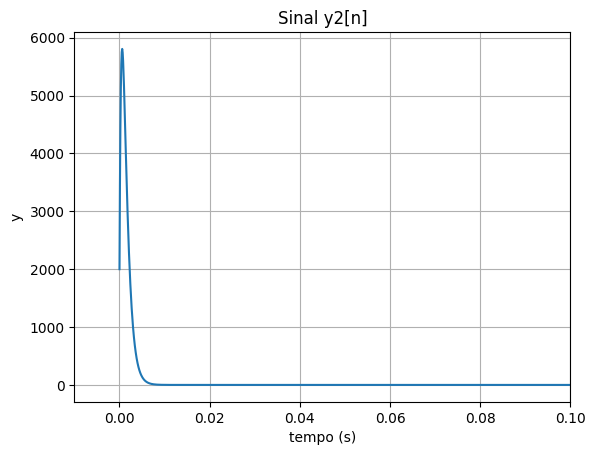

In [42]:
# Resposta da questão 3d

t = np.linspace(0, 1, 5000)
t2 = np.linspace(0, 1, 9999)
n_1 = np.linspace(0, 1/T1, 5000) # 0 até o periodo que fará o tempo ser 1 ( (1/T1) * T1 = 1)
n_2 = np.linspace(0, 1/T2, 5000)


def y_t(t): # y(t) = x(t) convoluido com h_a(t)
    return 2 * (np.exp(-500 * t) - np.exp(-1000 * t))

def x_1(n):
    return 2 * np.exp(-500 * n * T1)

def x_2(n):
    return 2 * np.exp(-500 * n * T2)

def y_1(n):
    return np.convolve(x_1(n), h1(n))

def y_2(n):
    return np.convolve(x_2(n), h2(n))

plt.plot(t, y_t(t), label='y(t)') 
plt.plot(t2, y_1(n_1), label='y1[n]') 
plt.plot(t2, y_2(n_2), label='y2[n]') 
plt.xlim(-0.01, 0.1)
plt.ylabel('y')
plt.xlabel('tempo (s)')
plt.title("Comparação y(t), y1[n] e y2[n]")
plt.grid(True)
plt.legend(loc='upper right')  
plt.show()


plt.plot(t, y_t(t))
plt.xlim(-0.01, 0.1)
plt.ylabel('y(t)')
plt.xlabel('tempo (s)')
plt.title("Sinal y(t)")
plt.grid(True)
plt.show()

plt.plot(t2, y_1(n_1))
plt.xlim(-0.01, 0.1)
plt.ylabel('y')
plt.xlabel('tempo (s)')
plt.title("Sinal y1[n]")
plt.grid(True)
plt.show()

plt.plot(t2, y_2(n_2))
plt.xlim(-0.01, 0.1)
plt.ylabel('y')
plt.xlabel('tempo (s)')
plt.title("Sinal y2[n]")
plt.grid(True)
plt.show()